# Practical Session 1: Data exploration and regression algorithms

*(Notebook developed by Ekaterina Kochmar)*

## 0.1. Dataset

The California House Prices Dataset is originally obtained from the StatLib repository. This dataset contains the collected information on the variables (e.g., median income, number of households, precise geographical position) using all the block groups in California from the 1990 Census. A block group is the smallest geographical unit for which the US Census Bureau publishes sample data, and on average it includes $1425.5$ individuals living in a geographically compact area. The [original data](http://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html) contains $20640$ observations on $9$ variables, with the *median house value* being the dependent variable (or *target attribute*). The [modified dataset](https://www.kaggle.com/camnugent/california-housing-prices) from Aurelien Geron, *Hands-On Machine Learning with Scikit-Learn and TensorFlow* contains an additional categorical variable.

For more information on the original data, please refer to Pace, R. Kelley and Ronald Barry, *Sparse Spatial Autoregressions*, Statistics and Probability Letters, 33 (1997) 291-297.

## 0.2. Understanding your task

You are given a dataset that contains a range of attributes describing the houses in California. Your task is to predict the median price of a house based on its attributes. That is, you should train a machine learning (ML) algorithm on the available data, and the next time you get new information on some housing in California, you can use your trained algorithm to predict its price.

The questions to ask yourself before starting a new ML project:
- Does the task suggest a supervised or an unsupervised approach?
- Are you trying to predict a discrete or a continuous value?
- Which ML algorithm is most suitable?

Try to answer these questions before you start working on this task, using the following hints:
- *Supervised* approaches rely on the availability of target label annotation in data; examples include regression and classification approaches. *Unsupervised* approaches don't use annotated data; clustering is a good example of such approach.
- *Discrete* variables are associated with classes and imply classification approach. *Continuous* variables are associated with regression.

## 0.3. Machine Learning check-list

In a typical ML project, you need to:

- Get the dataset
- Understand the data, the attributes and their correlations
- Split the data into training and test set
- Apply normalisation, scaling and other transformations to the attributes if needed
- Build a machine learning model
- Evaluate the model and investigate the errors
- Tune your model to improve performance

This practical will show you how to implement the above steps.

## 0.4. Prerequisites

If you're using Azure Notebooks, these libraries should already be installed. Some of you might have also used Jupiter notebooks with the following libraries before in the [CL 1A Scientific Computing course](https://notebooks.azure.com/djw1005/libraries/cl-scicomp).

If you would like to run the notebooks on your own machine, check if `Python 3` is installed. In addition, you will need the following libraries:

- `Pandas` for easy data uploading and manipulation. Check installation instructions at https://pandas.pydata.org/getpandas.html
- `Matplotlib`: for visualisations. Check installation instructions at https://matplotlib.org/users/installing.html
- `NumPy` and `SciPy`: for scietinfic programming. Check installation instruction at https://www.scipy.org/install.html
- `Scikit-learn`: for machine learning algorithms. Check installation instructions at http://scikit-learn.org/stable/install.html

Alternatively, a number of these libraries can be installed in one go through [Anaconda](https://www.anaconda.com/distribution/) distribution. 

## 0.5. Learning objectives

In this practical you will learn how to:

- upload and explore a dataset
- visualise and explore the correlations of the variables
- structure a machine learning project
- select the training and test data in a random and in a stratified way
- handle missing values
- handle categorical values
- implement a custom data transformer
- build a machine learning pipeline
- implement a regression algorithm
- evaluate a regression algorithm performance

In addition, you will learn about such common machine learning concepts as:
- data scaling and normalisation
- overfitting and underfitting
- cross-validation
- hyperparameter setting with grid search


## Step 1: Uploading and inspecting the data

First let's upload the dataset using `Pandas` and defining a function pointing to the location of the `housing.csv` file:

In [1]:
import pandas as pd
import os
import numpy as np

def load_data(housing_path):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

Now, let's run `load_data` using the path where you stored your `housing.csv` file. This function will return a `Pandas` DataFrame object containing all the data. It is always a good idea to take a quick look into the uploaded dataset and make sure you understand the data you are working with. For example, you can check the top rows of the uploaded data and get the general information about the dataset using `Pandas` functionality as follows:

In [2]:
housing = load_data("housing/")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Remember that each row in this table represents a block group (housing district), and each column an attribute. How many attributes does the dataset contain? 

Another way to get the summary information about the number of instances and attributes in the dataset is using `info` function. It also shows each attribute's type and number of non-null values:

In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Before proceeding further, think about the following: 
- How is the data represented? 
- What do the attribute types suggest? 
- Are there any missing values in the dataset? If so, should you do anything about them? 

You must have worked with numerical values before, and the data types like `float64` should look familiar. However, *ocean\_proximity* attribute has values of a different type. You can inspect the values of a particular attribute in the DataFrame using the following code:

In [4]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

The above suggests that the values are categorical: there are $5$ categories that define ocean proximity. ML algorithms prefer to work with numerical data, besides all the other attributes are represented using numbers. Keep that in mind, as this suggests that you will need to cast the categorical data as numerical.

For now, let's have a general overview of the attributes and distribution of their values (note *ocean_proximity* is excluded from this summary):

In [5]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


To make sure you understand the structure of the dataset, try answering the following questions: 
- How can you interpret the values in the table above?
- What do the percentiles (e.g., $25\%$ or $50\%$) tell you about the distibution of values in this dataset (you can select one particular attribute to explain)? 
- How are the missing values handled?

Remember that you can always refer to [`Pandas`](https://pandas.pydata.org/pandas-docs/stable/api.html) documentation.

Another good way to get an overview of the values distribution is to plot histograms. This time, you'll need to use `matplotlib`:

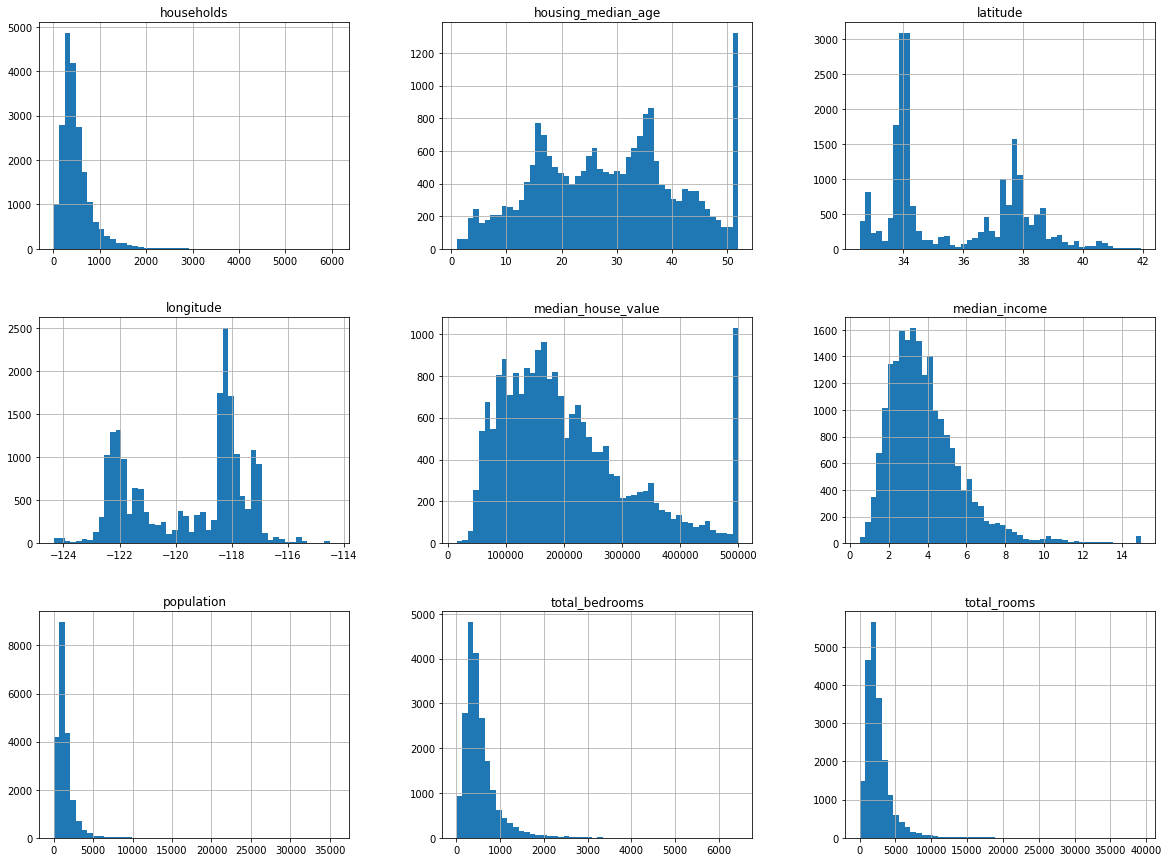

In [6]:
%matplotlib inline 
#so that the plot will be displayed in the notebook
import matplotlib.pyplot as plt

housing.hist(bins=50, figsize=(20,15))
plt.show()

Two observations about this graphs are worth noting:
- the *median_income*, *housing_median_age* and the *median_house_value* have been capped by the team that collected the data: that is, the values for *median_income* are scaled by dividing the income by $10000$ and capped so that they range between $[0.4999, 15.0001]$ with the incomes lower than $0.4999$ and higher than $15.0001$ binned together; similarly, the *housing_median_age* have been scaled and binned to range between $[1, 52]$ years and the *median_house_value* – to range between $[14999, 500001]$. Data manipulations like these are not unusual in data science but it's good to be aware of how the data is represented;
- several other attributes are "tail heavy" – they have a long distribution tail with many decreasingly rare values to the right of the mean. In practice that means that you might consider using the logarithms of these values rather than the absolute values.

## Step 2: Splitting the data into training and test sets

In this practical, you are working with a dataset that has been collected and thoroughly labelled in the past. Each instance has a predefined set of values and the correct price label assigned to it. After training the ML model on this dataset you hope to be able to predict the prices for new houses, not contained in this dataset, based on their characteristics such as geographical position, median income, number of rooms and so on. How can you check in advance whether your model is good in making such predictions?

The answer is: you set part of your dataset, called *test set*, aside and use it to evaluate the performance of your model only. You train and tune your model using the rest of the dataset – *training set* – and evaluate the performance of the model trained this way on the test set. Since the model doesn't see the test set during training, this perfomance should give you a reasonable estimate of how well it should perform on new data. Traditionally, you split the data into $80\%$ training and $20\%$ test set, making sure that the test instances are selected randomly so that you don't end up with some biased selection resulting in over-optimistic or over-pessimistic results on your test set.

For example, you can select your test set as the code below shows. To ensure random selection of the test items, use `np.random.permutation`. However, if you want to ensure that you have a stable test set and the same test instances get selected from the dataset in a random fashion in different runs of the program, select a random seed, e.g. using `np.random.seed(42)`.

In [7]:
import numpy as np
np.random.seed(42)

def split_train_test(data, test_ratio):    
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

train_set, test_set = split_train_test(housing, 0.2)
print(len(train_set), "training instances +", len(test_set), "test instances")

16512 training instances + 4128 test instances


Note that `scikit-learn` provides a similar functionality to the code above with its `train_test_split` function. Morevoer, you can pass it several datasets with the same number of rows each, and it will split them into training and test sets on the same indices (you might find it useful if you need to pass in a separate DataFrame with labels):

In [8]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
print(len(train_set), "training instances +", len(test_set), "test instances")

16512 training instances + 4128 test instances


So far, you have been selecting your test set using random sampling methods. If your data is representative of the task at hand, this should help ensure that the results of the model testing are informative. However, if your dataset is not very large and the data is skewed on some of the attributes or on the target label (as is often the case with the real-world data), random sampling might introduce a sampling bias. *Stratified sampling* is a technique that helps make sure that the distributions of the instance attributes or labels in the training and the test sets are similar, meaning that the proportion of instances drawn from each *stratum* in the dataset is similar in the training and test data.

Sampling bias may express itself both in the distribution of labels and in the distribution of the attribute values.  For instance, take a look at the *median_income* attribute value distribution. Suppose for now (and you might find a confirmation to that later in the practical) that this attribute is predictive of the house price, however its values are unevenly distributed across the range of $[0.4999, 15.0001]$ with a very long tail. If random sampling doesn't select enough instances for each *stratum* (each range of incomes) the estimate of the under-represented strata's importance will be biased. 

First, to limit the number of income categories (strata), particularly at the long tail, let's apply further binning to the income values: e.g., you can divide the income by $1.5$, round up the values using `ceil` to have discrete categories (bins), and merge all the categories greater than $5$ into category $5$. The latter can be achieved using `Pandas`' `where` functionality, keeping the original values when they are smaller than $5$ and converting them to $5$ otherwise:

In [9]:
housing["income_cat"] = np.ceil(housing["median_income"] / 1.5)
housing["income_cat"].where(housing["income_cat"] < 5, 5.0, inplace = True)

housing["income_cat_alt"] = np.ceil(np.log2(housing['median_income'])/np.log2(1.3))
housing["income_cat_alt"].where(housing["income_cat_alt"] < 8, 8.0, inplace=True)
housing["income_cat_alt"].where(housing["income_cat_alt"] > 3.0, 3.0, inplace=True)


(array([   0.,  822., 6581., 7236., 3639., 2362.,    0.,    0.,    0.]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 9 Patch objects>)

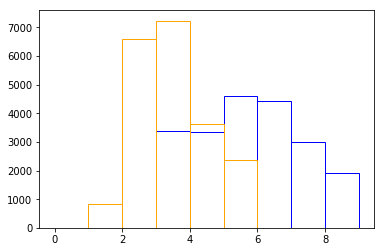

In [10]:
bins = np.arange(0, 10, 0.5)
altbins=np.arange(0,10)
plt.hist(housing['income_cat_alt'], bins=altbins, edgecolor='blue', fill=False)
plt.hist(housing['income_cat'], bins=altbins,edgecolor='orange', fill=False)

Now you have a much smaller number of categories of income, with the instances more evenly distributed, so you can hope to get enough data to represent the tail. Next, let's split the dataset into training and test sets making sure both contain similar proportion of instances from each income category. You can do that using `scikit-learn`'s `StratifiedShuffleSplit` specifying the condition on which the data should be stratified (in this case, income category):

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.iloc[train_index]
    strat_test_set = housing.iloc[test_index]
split_alt = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split_alt.split(housing, housing["income_cat_alt"]):
    strat_train_set_alt = housing.iloc[train_index]
    strat_test_set_alt = housing.iloc[test_index]

In [12]:
list(split.split(housing, housing["income_cat"]))
# RETURNS LIST OF SPLITS TO CATER FOR MULTIPLE TABLES AT ONCE

[(array([17606, 18632, 14650, ..., 13908, 11159, 15775]),
  array([ 5241, 10970, 20351, ...,  4019, 12107,  2398]))]

Let's compare the distribution of the income values in the randomly selected train and test sets and the stratified train and test sets against the full dataset. To better understand the effect of random sampling versus stratified sampling, let's also estimate the error that would be introduced in the data by such splits:

In [13]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

def income_cat_proportions(data):
    return data["income_cat"].value_counts() / len(data)

def income_cat_proportions_alt(data):
    return data["income_cat_alt"].value_counts() / len(data)


compare_props = pd.DataFrame({
    "Overall": income_cat_proportions(housing),
    "Stratified tr": income_cat_proportions(strat_train_set),
    "Random tr": income_cat_proportions(train_set),
    "Stratified ts": income_cat_proportions(strat_test_set),
    "Random ts": income_cat_proportions(test_set),
    "Overall": income_cat_proportions(housing),
    "Alt Stratified tr": income_cat_proportions_alt(strat_train_set_alt),
    "Alt Stratified ts": income_cat_proportions_alt(strat_test_set_alt),
    "Alt Random tr": income_cat_proportions_alt(train_set),
    "Alt Random ts": income_cat_proportions_alt(test_set),
    "Alt Overall": income_cat_proportions_alt(housing),

})

compare_props["Rand. tr %error"] = 100 * compare_props["Random tr"] / compare_props["Overall"] - 100
compare_props["Rand. ts %error"] = 100 * compare_props["Random ts"] / compare_props["Overall"] - 100
compare_props["Strat. tr %error"] = 100 * compare_props["Stratified tr"] / compare_props["Overall"] - 100
compare_props["Strat. ts %error"] = 100 * compare_props["Stratified ts"] / compare_props["Overall"] - 100

compare_props["Alt Strat. tr %error"] = 100 * compare_props["Alt Stratified tr"] / compare_props["Alt Overall"] - 100
compare_props["Alt Strat. ts %error"] = 100 * compare_props["Alt Stratified ts"] / compare_props["Alt Overall"] - 100

compare_props.sort_index()

,Overall,Stratified tr,Random tr,Stratified ts,Random ts,Alt Stratified tr,Alt Stratified ts,Alt Random tr,Alt Random ts,Alt Overall,Rand. tr %error,Rand. ts %error,Strat. tr %error,Strat. ts %error,Alt Strat. tr %error,Alt Strat. ts %error
1.0,0.039826,0.039850,0.039729,0.039729,0.040213,NaN,NaN,NaN,NaN,NaN,-0.243309,0.973236,0.060827,-0.243309,NaN,NaN
2.0,0.318847,0.318859,0.317466,0.318798,0.324370,NaN,NaN,NaN,NaN,NaN,-0.433065,1.732260,0.003799,-0.015195,NaN,NaN
3.0,0.350581,0.350594,0.348595,0.350533,0.358527,0.163154,0.163033,0.162912,0.164002,0.163130,-0.566611,2.266446,0.003455,-0.013820,0.014850,-0.059400
4.0,0.176308,0.176296,0.178537,0.176357,0.167393,0.162246,0.162306,0.160671,0.168605,0.162258,1.264084,-5.056334,-0.006870,0.027480,-0.007465,0.029860
5.0,0.114438,0.114402,0.115673,0.114583,0.109496,0.222505,0.222384,0.221596,0.226017,0.222481,1.079594,-4.318374,-0.031753,0.127011,0.010889,-0.043554
6.0,NaN,NaN,NaN,NaN,NaN,0.213966,0.214147,0.213178,0.217297,0.214002,NaN,NaN,NaN,NaN,-0.016980,0.067919
7.0,NaN,NaN,NaN,NaN,NaN,0.145954,0.146076,0.148559,0.135659,0.145979,NaN,NaN,NaN,NaN,-0.016595,0.066379
8.0,NaN,NaN,NaN,NaN,NaN,0.092175,0.092054,0.093084,0.088421,0.092151,NaN,NaN,NaN,NaN,0.026288,-0.105152


As you can see, the distributions in the stratified training and test set are much closer to the original distribution of categories as well as being much closer to each other. 

Note, that to help you split the data, you had to introduce a new category – *income_cat* – which contains the same information as the original attribute *median_income* binned in a different way:

In [14]:
strat_train_set_with_labels = strat_train_set.copy()

strat_train_set_with_labels.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,income_cat,income_cat_alt
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432,-0.016243,-0.019430
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724,-0.078848,-0.082636
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110,-0.139385,-0.139251
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097,0.221690,0.224950
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689,0.012502,0.014851
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920,0.022848,0.021225
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506,0.034995,0.038106
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160,0.902156,0.900355
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000,0.642274,0.645249
income_cat,-0.016243,-0.078848,-0.139385,0.221690,0.012502,0.022848,0.034995,0.902156,0.642274,1.000000,0.931705


Before proceeding further let's remove the *income_cat* attribute so the data is back to its original state. Here is how you can do that:

In [15]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop(["income_cat", "income_cat_alt"], axis=1, inplace=True)

strat_train_set.info()

# This makes sense, as the correlation is lower for the categorical data than for the continuous data.
# We also do not want to use the alternative categories since they give a higher split error.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 17606 to 15775
Data columns (total 10 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16354 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
median_house_value    16512 non-null float64
ocean_proximity       16512 non-null object
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


/home/dks28/.local/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


## Step 3: Exploring the attributes

The next step is to look more closely into the attributes and gain insights into the data. In particular, you should try to answer the following questions: 
- Which attributes look most informative? 
- How do they correlate with each other and the target label?
- Is any further normalisation or scaling needed?

The most informative ways in which you can answer the questions above are by *visualising* the data and by *collecting additional statistics* on the attributes and their relations to each other.

First, remember that from now on you're only looking into and gaining insights from the training data. You will use the test data at the evaluation step only, thus ensuring no data leakage between the training and test sets occurs and the results on the test set are a fair evaluation of your algorithm's performance. Let's make a copy of the training set that you can experiment with without a danger of overwriting or changing the original data: 

In [16]:
housing = strat_train_set.copy()

### Visualisations

The first two attributes describe the geographical position of the houses. Let's apply further visualisations and look into the geographical area that is covered: for that, use a scatter plot plotting longitude against latitude coordinates. To make the scatter plot more informative, use `alpha` option to highlight high density points:

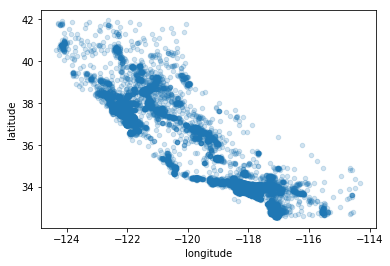

In [17]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.2)

You can experiment with `alpha` values to get a better understanding, but it should be obvious from these plots that the areas in the south and along the coast of California are more densely populated (roughly corresponding to the Bay Area, Los Angeles, San Diego, and the Central Valley). 

Now, what does geographical position suggest about the housing prices? In the following code, the size of the circles represents the size of the population, and the color represents the price, ranging from blue for low prices to red for high prices (this color scheme is specified by the preselected `cmap` type):

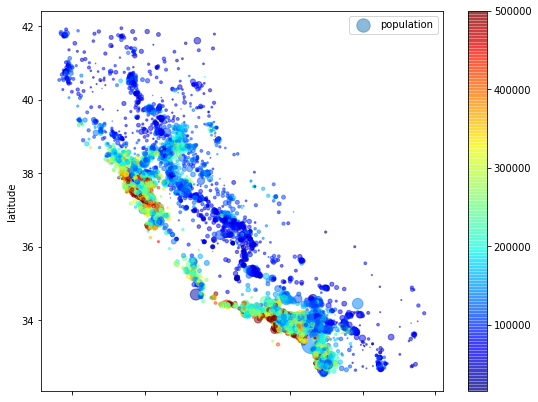

In [18]:
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.5,
            s=housing["population"]/100, label="population", figsize=(9,7), 
            c=housing["median_house_value"], cmap=plt.get_cmap("jet"), colorbar="True",
            )
plt.legend()

This plot suggests that the housing prices depend on the proximity to the ocean and on the population size. What does this suggest about the informativeness of the attributes for your ML task?

### Correlations

Let's also look into how the attributes correlate with each other:

In [19]:
corr_matrix = housing.corr()
corr_matrix

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105848,0.048871,0.076598,0.108030,0.063070,-0.019583,-0.047432
latitude,-0.924478,1.000000,0.005766,-0.039184,-0.072419,-0.115222,-0.077647,-0.075205,-0.142724
housing_median_age,-0.105848,0.005766,1.000000,-0.364509,-0.325047,-0.298710,-0.306428,-0.111360,0.114110
total_rooms,0.048871,-0.039184,-0.364509,1.000000,0.929379,0.855109,0.918392,0.200087,0.135097
total_bedrooms,0.076598,-0.072419,-0.325047,0.929379,1.000000,0.876320,0.980170,-0.009740,0.047689
population,0.108030,-0.115222,-0.298710,0.855109,0.876320,1.000000,0.904637,0.002380,-0.026920
households,0.063070,-0.077647,-0.306428,0.918392,0.980170,0.904637,1.000000,0.010781,0.064506
median_income,-0.019583,-0.075205,-0.111360,0.200087,-0.009740,0.002380,0.010781,1.000000,0.687160
median_house_value,-0.047432,-0.142724,0.114110,0.135097,0.047689,-0.026920,0.064506,0.687160,1.000000


Since you are trying to predict the house value, the last column in this table is the most informative. Let's make the output clearer:

In [20]:
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

This makes it clear that the *median_income* is most strongly positively correlated with the price. There is small positive correlation of the price with *total_rooms* and *housing_median_age*, and small negative correlation with *latitude*, which suggests that the prices go up with the increase in income, number of rooms and house age, and go down when you go north. `Pandas`' `scatter_matrix` function allows you to visualise the correlation of attributes with each other (note that since the correlation of an attribute with itself will result in a straight line, `Pandas` uses a histogram instead – that's what you see along the diagonal):

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc2b309f710>,
      dtype=object)

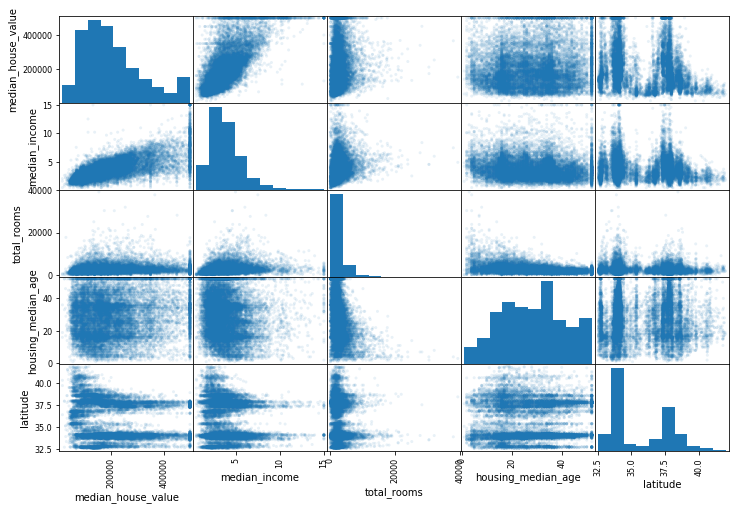

In [21]:
from pandas.plotting import scatter_matrix
# If the above returns an error, use the following:
#from pandas.tools.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age", "latitude"]
scatter_matrix(housing[attributes], figsize=(12,8), alpha=0.1)

These plots confirm that the income attribute is the most promising one for predicting house prices, so let's zoom in on this attribute:

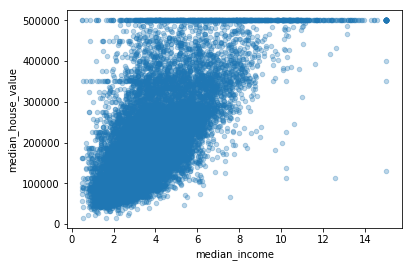

In [22]:
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.3)

There are a couple of observations to be made about this plot:
- The correlation is indeed quite strong: the values follow the upward trend and are not too dispersed otherwise;
- You can clearly see a line around $500000$ which covers a full range of income values and is due to the fact that the house prices above that value were capped in the original dataset. However, the plot suggests that there are also some other less obvious groups of values, most visible around $350000$ and $450000$, that also cover a range of different income values. Since your ML algorithm will learn to reproduce such data quirks, you might consider looking into these matters further and removing these districts from your dataset (after all, in any real-world application, one can expect a certain amount of noise in the data and clearing the data is one of the steps in any practical application). 

The next thing to notice is that a number of attributes from the original dataset, including *total_rooms*, 	*total_bedrooms* and *population*, do not actually describe each house in particular but rather represent the cumulative counts for *all households* in the block group. At the same time, the task at hand requires you to predict the house price for *each individual household*. In addition, an attribute that measures the proportion of bedrooms against the total number of rooms might be informative. Therefore, the following transformed attributes might be more useful for the prediction:

In [23]:
housing["rooms_per_household"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_per_household"] = housing["total_bedrooms"] / housing["households"]
housing["bedrooms_per_rooms"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_household"] = housing["population"] / housing["households"]

A good way to check whether these transformations have any effect on the task is to check attributes correlations again:

In [24]:
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
bedrooms_per_household     -0.043343
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_rooms         -0.259984
Name: median_house_value, dtype: float64

You can see that the number of rooms per household is more strongly correlated with the house price – the more rooms the more expensive the house, while the proportion of bedrooms is more strongly correlated with the price than either the number of rooms or bedrooms in the household – since the correlation is negative, the lower the bedroom-to-room ratio, the more expensive the property.

## Step 4: Data preparation and transformations for machine learning algorithms

Now you are almost ready to implement a regression algorithm for the task at hand. However, there are a couple of other things to address, in particular:
- handle missing values if there are any;
- convert all attribute values (e.g. categorical, textual) into numerical format;
- scale / normalise the feature values if necessary.

First, let's separate the labels you're trying to predict (*median_house_value*) from the attributes in the dataset that you will use as *features*. The following code will keep a copy of the labels and the rest of the attributes separate (note that `drop()` will create a copy of the data and will not affect `strat_train_set` itself): 

In [25]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()



You can add the transformed features that you found useful before with the additional function as shown below. Then you can run `add_features(housing)` to add the features:

In [26]:
def add_features(data):
    # add the transformed features that you found useful before
    data["rooms_per_household"] = data["total_rooms"] / data["households"]
    data["bedrooms_per_household"] = data["total_bedrooms"] / data["households"]
    data["bedrooms_per_rooms"] = data["total_bedrooms"] / data["total_rooms"]
    data["population_per_household"] = data["population"] / data["households"]
    
#add_features(housing)

You will learn shortly about how to implement your own *data transformers* and will be able to re-implement addition of these features as a data transfomer.

### Handling missing values

In Step 1 above, when you took a quick look into the dataset, you might have noticed that all attributes but one have $20640$ values in the dataset; *total_bedrooms* has $20433$, so some values are missing. ML algorithms cannot deal with missing values, so you'll need to decide how to replace these values. There are three possible solutions:

1. remove the corresponding housing blocks from the dataset (i.e., remove the rows in the dataset)
2. remove the whole attribute (i.e., remove the column)
3. set the missing values to some predefined value (e.g., zero value, the mean, the median, the most frequent value of the attribute, etc.)

The following `Pandas` functionality will help you implement each of these options:

In [27]:
## option 1:
# housing.dropna(subset=["total_bedrooms"])
## option 2:
# housing.drop("total_bedrooms", axis=1)
# option 3:
median = housing["total_bedrooms"].median()
housing["total_bedrooms"].fillna(median, inplace=True)

Although, all three options are possible, keep in mind that in the first two cases you are throwing away either some valuable attributes (e.g., as you've seen earlier, *bedrooms_per_rooms* correlates well with the label you're trying to predict) or a number of valuable training examples. Option 3, therefore, looks more promising. Note, that for that you estimate a mean or median based on the training set only (as, in general, your ML algorithm has access to the training data only during the training phase), and then store the mean / median values to replace the missing values in the test set (or any new dataset, to that effect). In addition, you might want to calculate and store the mean / median values for all attributes as in a real-life application you can never be sure if any of the attributes will have missing values in the future.

Here is how you can calculate and store median values using `sklearn` (note that you'll need to exclude `ocean_proximity` attribute from this calculation since it has non-numerical values):

In [28]:
from sklearn.impute import SimpleImputer as Imputer

imputer = Imputer(strategy="median")
housing_num = housing.drop("ocean_proximity", axis=1)
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

You can check the median values stored in the `imputer` as follows:

In [29]:
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

and also make sure that they exactly coincide with the median values for all numerical attributes:

In [30]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

Finally, let's replace the missing values in the training data:

In [31]:
X = imputer.transform(housing_num)
housing_tr = pd.DataFrame(X, columns=housing_num.columns)
housing_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 8 columns):
longitude             16512 non-null float64
latitude              16512 non-null float64
housing_median_age    16512 non-null float64
total_rooms           16512 non-null float64
total_bedrooms        16512 non-null float64
population            16512 non-null float64
households            16512 non-null float64
median_income         16512 non-null float64
dtypes: float64(8)
memory usage: 1.0 MB


### Handling textual and categorical attributes

Another aspect of the dataset that should be handled is the textual / categorical values of the *ocean_proximity* attribute. ML algorithms prefer working with numerical data, so let's use `slearn`'s functionality and cast the categorical values as numerical values as follows:

In [32]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
housing_cat_encoded = encoder.fit_transform(housing["ocean_proximity"])
housing_cat_encoded

array([0, 0, 4, ..., 1, 0, 3])

The code above mapped the categories to numerical values. You can check what the numerical values correspond to in the original data using:

In [33]:
encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype=object)

One problem with the encoding above is that the ML algorithm will automatically assume that the numerical values that are close to each other encode similar concepts, which for this data is not quite true: for example, value $0$ corresponding to *$<$1H OCEAN* category is actually most similar to values $3$ and $4$ (*NEAR BAY* and *NEAR OCEAN*) and not to value $1$ (*INLAND*).

An alternative to this encoding is called *one-hot encoding* and it runs as follows: for each category, it creates a separate binary attribute which is set to $1$ (hot) when the category coincides with the attribute, and $0$ (cold) otherwise. So, for instance, *$<$1H OCEAN* will be encoded as a one-hot vector $[1, 0, 0, 0, 0]$ and *NEAR OCEAN* will be encoded as $[0, 0, 0, 0, 1]$. The following `sklearn`'s functionality allows to convert categorical values into one-hot vectors:

In [34]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder()
# fit_transform expects a 2D array, but housing_cat_encoded is a 1D array.
# Reshape it using NumPy's reshape functionality where -1 simply means "unspecified" dimension 
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_cat_1hot

/home/dks28/.local/lib/python3.6/site-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

Note that the data format above says that the output is a sparse matrix. This means that the data structure only stores the location of the non-zero elements, rather than the full set of vectors which are mostly full of zeros. You can check the [documentation on sparse matrices](https://www.scipy-lectures.org/advanced/scipy_sparse/introduction.html#why-sparse-matrices) if you'd like to learn more. If you'd like to see how the encoding looks like you can also convert it back into a dense NumPy array using:

In [35]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

The steps above, including casting text categories to numerical categories and then converting them into 1-hot vectors, can be performed using `sklearn`'s `LabelBinarizer`:

In [67]:
from sklearn.preprocessing import LabelBinarizer

encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing["ocean_proximity"])
encoder.classes_

array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
      dtype='<U10')

The above produces dense array as an output, so if you'd like to have a sparse matrix instead you can specify it in the `LabelBinarizer` constructor:

In [37]:
encoder = LabelBinarizer(sparse_output=True)
housing_cat_1hot = encoder.fit_transform(housing["ocean_proximity"])
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.int64'>'
	with 16512 stored elements in Compressed Sparse Row format>

### Data transformers

A useful functionality of `sklearn` is [data transformers](http://scikit-learn.org/stable/data_transforms.html): you will see them used in preprocessing very often. For example, you have just used one to impute the missing values. In addition, you can implement your own custom data transformers. In general, a transformer class needs to implement three methods:
- a constructor method;
- a `fit` method that learns parameters (e.g. mean and standard deviation for a normalization transformer) or returns `self`; and
- a `transform` method that applies the learned transformation to the new data.

Whenever you see `fit_transform` method, it means that the method uses an optimised combination of `fit` and `transform`. Here is how you can implement a data transformer that will convert categorical values into 1-hot vectors:

In [38]:
from sklearn.base import TransformerMixin # TransformerMixin allows you to use fit_transform method

class CustomLabelBinarizer(TransformerMixin):
    def __init__(self, *args, **kwargs):
        self.encoder = LabelBinarizer(*args, **kwargs)
    def fit(self, X, y=0):
        self.encoder.fit(X)
        return self
    def transform(self, X, y=0):
        return self.encoder.transform(X)

Similarly, here is how you can wrap up adding new transformed features like bedroom-to-room ratio with a data transformer:

In [39]:
from sklearn.base import BaseEstimator, TransformerMixin 
# BaseEstimator allows you to drop *args and **kwargs from you constructor
# and, in addition, allows you to use methods set_params() and get_params()

rooms_id, bedrooms_id, population_id, household_id = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_rooms = True): # note no *args and **kwargs used this time
        self.add_bedrooms_per_rooms = add_bedrooms_per_rooms
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_id] / X[:, household_id]
        bedrooms_per_household = X[:, bedrooms_id] / X[:, household_id]
        population_per_household = X[:, population_id] / X[:, household_id]
        if self.add_bedrooms_per_rooms:
            bedrooms_per_rooms = X[:, bedrooms_id] / X[:, rooms_id]
            return np.c_[X, rooms_per_household, bedrooms_per_household, 
                         population_per_household, bedrooms_per_rooms]
        else:
            return np.c_[X, rooms_per_household, bedrooms_per_household, 
                         population_per_household]
        
attr_adder = CombinedAttributesAdder()
housing_extra_attribs = attr_adder.transform(housing.values)
housing_extra_attribs

array([[-121.89, 37.29, 38.0, ..., 1.0353982300884956, 2.094395280235988,
        0.22385204081632654],
       [-121.93, 37.05, 14.0, ..., 0.9557522123893806,
        2.7079646017699117, 0.15905743740795286],
       [-117.2, 32.77, 31.0, ..., 1.0194805194805194, 2.0259740259740258,
        0.24129098360655737],
       ...,
       [-116.4, 34.09, 9.0, ..., 1.1398692810457516, 2.742483660130719,
        0.1796086508753862],
       [-118.01, 33.82, 31.0, ..., 1.0674157303370786, 3.808988764044944,
        0.19387755102040816],
       [-122.45, 37.77, 52.0, ..., 1.0672926447574336,
        1.9859154929577465, 0.22035541195476574]], dtype=object)

In [40]:
from tqdm import tqdm_notebook as tqdm
class PowerTailAttributesLogger(BaseEstimator, TransformerMixin):
    def __init__(self, power_tail_attributes):
        self.columns = dict(map(lambda p: p[::-1], enumerate(list(housing_num))))
        self.pow_atts = [self.columns[a] for a in power_tail_attributes]
    def fit(self, X, y=None):
        return self
    def transform(self, X, y=None):
        print(self.pow_atts)
        log_features = [np.log(np.array(X[:,a])) for a in tqdm(self.pow_atts)]
        
        return np.c_[X,np.transpose(log_features)]

logattr_adder = PowerTailAttributesLogger(['households','median_income','population','total_bedrooms', 'total_rooms'])
housing_log_attribs = logattr_adder.transform(np.array(housing_num.values,dtype=float))

[6, 7, 5, 4, 3]


If you'd like to explore the new attributes, you can convert the check the `housing_extra_attribs` into a `Pandas` DataFrame and apply the functionality as before:

In [41]:
housing_extra_attribs_df = pd.DataFrame(housing_extra_attribs, columns=list(housing.columns)+
                                     ["rooms_per_household", "bedrooms_per_household", 
                                      "population_per_household", "bedrooms_per_rooms"])

housing_log_attribs_df = pd.DataFrame(housing_log_attribs, columns=list(housing_num.columns)+
                                     ["households_log", "income_log", "population_log", "bedroom_log", "rooms_log"])


### Feature scaling

Finally, ML algorithms do not typically perform well when the feature values cover significantly different range of values. For example, in the dataset at hand, the income ranges from $0.4999$ to $15.0001$, while population ranges from $3$ to $35682$. Taken at the same scale, these values are not directly comparable. The data transformation that should be applied to these values is called *feature scaling*.

One of the most common ways to scale the data is to apply *min-max scaling* (also often referred to as *normalisaton*). Min-max scaling puts all values on the scale of $[0, 1]$ making the ranges directly comparable. For that, you need to subtract the min from the actual value and divide by the difference between the maximum and minimum values, i.e.:

\begin{equation}
f_{scaled} = \frac{f - F_{min}}{F_{max} - F_{min}}
\end{equation}

where $f \in F$ is the actual feature value of a feature type $F$, and $F_{min}$ and $F_{max}$ are the minumum and maximum values for the feature of type $F$.

Another common approach is *standardisation*, which subtracts the mean value (so the standardised values have a zero mean) and divides by the variance (so the standardised values have unit variance). Standardisation does not impose a specific range on the values and is more robust to the outliers: i.e., a noisy input or an incorrect income value of $100$ (when the rest of the values lie within the range of $[0.4999, 15.0001]$) will introduce a significant skew in the data after min-max scaling.

`Scikit-learn` has an implementation for the `MinMaxScaler`, `StandardScaler`, as well as [other scaling approaches](http://scikit-learn.org/stable/modules/preprocessing.html#preprocessing-scaler), i.e.:

In [42]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = StandardScaler()
housing_tr_scaled = scaler.fit_transform(housing_tr)

### Putting all the data transformations together

Another useful functionality of `sklearn` is pipelines. These allow you to stack several separate transformations together. For example, you can apply the numerical transformations such as missing values handling and data scaling as follows:

In [43]:
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ('imputer', Imputer(strategy="median")),
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)
housing_num_tr.shape

(16512, 8)

Pipelines are useful because they help combining several steps together, so that the output of one data transformer (e.g., `Imputer`) is passed on as an input to the next one (e.g., `StandardScaler`) and so you don't need to worry about the intermediate steps. Besides, it makes the code look more concise and readable. However:
- the code above doesn't handle categorical values;
- we started with `Pandas` DataFrames because they are useful for data uploading and inspection, but the `Pipeline` expects `NumPy` arrays as input, and at the moment, `sklearn`'s `Pipeline` cannot handle `Pandas` DataFrames.

In fact, there is a way around the two issues above. Let's implement another custom data transformer that will allow you to select specific attributes from a `Pandas` DataFrame:

In [44]:
from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

The transformer above allows you to select a predefined set of attributes from a DataFrame, dropping the rest and converting the selected ones into a `NumPy` array. This is quite useful because now you can select the numerical attributes and apply one set of transformations to them, and then select categorical attributes and apply another set of transformation to them, i.e.:

In [45]:
num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_attribs)),
        ('imputer', Imputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
#        ('logger', PowerTailAttributesLogger(['households','median_income','population','total_bedrooms', 'total_rooms'])),
        ('std_scaler', StandardScaler()),
    ])

cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_attribs)),
        ('label_binarizer', CustomLabelBinarizer()),
    ])

Finally, to merge the output of the two separate data transformers back together, you can use `sklearn`'s `FeatureUnion` functionality: it runs the two pipelines' `fit` methods and the two `transform` methods in parallel, and then concatenates the output. I.e.:

In [46]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])


housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

# For experimentation: Does it help to remove all the patterns around 350000, 450000, 500001?
housing_full = housing.copy()
housing_labels_full = housing_labels.copy()
rows_dropped = housing_labels.loc[housing_labels==350000].append(
    housing_labels.loc[housing_labels==450000]).append(
    housing_labels.loc[housing_labels==500001]).index

housing.drop(rows_dropped, axis=0, inplace=True)
housing_labels.drop(rows_dropped, axis=0, inplace=True)

housing_prepared = full_pipeline.fit_transform(housing)
print(housing_prepared.shape)
housing_prepared

(15633, 17)


array([[-1.16165754,  0.75800806,  0.7730587 , ...,  0.        ,
         0.        ,  0.        ],
       [-1.18162451,  0.64658727, -1.15012825, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.17946886, -1.34041682,  0.21212917, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.99976619, -0.82509567,  0.93332428, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.57880812, -0.72760248, -1.55079219, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.77513786, -0.85295087,  0.21212917, ...,  0.        ,
         0.        ,  0.        ]])

In [47]:
housing_prepared[:, -6:]



array([[ 0.13334836,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [-0.87579378,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ],
       [ 0.40495079,  0.        ,  0.        ,  0.        ,  0.        ,
         1.        ],
       ...,
       [ 0.47547848,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [-0.55571936,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ],
       [-0.33348868,  1.        ,  0.        ,  0.        ,  0.        ,
         0.        ]])

## Step 5:  Implementation, evaluation and fine-tuning of a regression model

Now that you've explored and prepared the data, you can implement a regression model to predict the house prices on the test set. 

### Training and evaluating the model

Let's train a [Linear Regression](http://scikit-learn.org/stable/modules/linear_model.html) model first. During training, a Linear Regression model tries to find the optimal set of weights $w=(w_{1}, w_{2}, ..., w_{n})$ for the features (attributes) $X=(x_{1}, x_{2}, ..., x_{n})$ by minimising the residual sum of squares between the responses predicted by such linear approximation $Xw$ and the observed responses $y$ in the dataset, i.e. trying to solve:

\begin{equation}
min_{w} ||Xw - y||_{2}^{2}
\end{equation}

In [48]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

First, let's try the model on some instances from the training set itself:

In [49]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
# note the use of transform, as you'd like to apply already learned (fitted) transformations to the data
some_data_prepared = full_pipeline.transform(some_data)

print("Predictions:", list(lin_reg.predict(some_data_prepared)))
print("Actual labels:", list(some_labels))

Predictions: [198639.02411129116, 309166.143096825, 197938.51606300523, 60513.63329776298, 186150.55377183045]
Actual labels: [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


The above shows that the model is able to predict some price values, however they don't seem to be very accurate. How can you measure the performance of your model in a more comprehensive way?

Typically, the output of the regression model is measured in terms of the error in prediction. There are two error measures that are commonly used. *Root Mean Square Error (RMSE)* measures the average deviation of the model's prediction from the actual label, but note that it gives a higher weight for large errors:

\begin{equation}
RMSE(X, h) = \sqrt{\frac{1}{m} \sum_{i=1}^{m} (h(x^{(i)}) - y^{(i)})^{2}}
\end{equation}

where $m$ is the number of instances, $h$ is the model (hypothesis), $X$ is the matrix containing all feature values, $x^{(i)}$ is the feature vector describing instance $i$, and $y^{(i)}$ is the actual label for instance $i$.

Because *RMSE* is highly influenced by the outliers (i.e., large errors), in some situations *Mean Absolute Error (MAE)* is preferred. You may note that its estimation is somewhat similar to the estimation of *RMSE*:

\begin{equation}
MAE(X, h) = \frac{1}{m} \sum_{i=1}^{m} |h(x^{(i)}) - y^{(i)}|
\end{equation}

Let's measure the performance of the linear regression model using these error estimations:

In [50]:
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

58925.444073381725

Given that the majority of the districts' housing values lie somewhere between $[\$100000, \$300000]$ an estimation error of over $68000$ is very high. This shows that the regression model *underfits* the training data: it doesn't capture the patterns in the training data well enough because it lacks the descriptive power either due to the features not providing enough information to make a good prediction or due to the model itself being not complex enough. The ways to fix this include:
- using more features and/or more informative features, for example applying log to some of the existing features to address the long tail distributions;
- using more complex models;
- reducing the constraints on the model.

The model that you used above is not constrained (or, *regularised* – more on this in later lectures), so you should try using more powerful models or work on the feature set.

For example, *polynomial regression* models the relationship between the $X$ and $y$ as an $n$-th degree polynomial. Polynomial regression extends simple linear regression by constructing polynomial features from the existing ones. For simplicity, assume that your data has only $2$ features rather than $8$, i.e. $X=[x_{1}, x_{2}]$. The linear regression model above tries to learn the coefficients (weights) $w=[w_{0}, w_{1}, w_{3}]$ for the linear prediction (a plane) $\hat{y} = w_{0} + w_{1}x_{1} + w_{2}x_{2}$ that minimises the residual sum of squares between the prediction and actual label as you've seen above. 

If you want to fit a paraboloid to the data instead of a plane, you can combine the features in second-order polynomials, so that the model looks like this: 

\begin{equation}
\hat{y} = w_{0} + w_{1}x_{1} + w_{2}x_{2} + w_{3}x_{1}x_{2} + w_{4}x_{1}^2 + w_{5}x_{2}^2
\end{equation}

This time, the model tries to learn an optimal set of weights $w=[w_{0}, ..., w_{5}]$ (note that $w_{0}$ is called an intercept).

Note that polynomial regression still employs a linear model. For instance, you can define a new variable $z = [x_1, x_2, x_1x_2, x_1^2, x_2^2]$ and rewrite the polynomial above as:

\begin{equation}
\hat{y} = w_{0} + w_{1}z_{0} + w_{2}z_{1} + w_{3}z_{2} + w_{4}z_{3} + w_{5}z_{4}
\end{equation}

For that reason, the polynomial regression in `sklearn` is addressed at the `preprocessing` steps – that is, first the second-order polynomials are estimated on the features, and then the same `LinearRegression` model as above is applied. For instance, use a second- and third-order polynomials and compare the results (feel free to use higher order polynomials, though keep in mind that as the complexity of the model increases, so does the processing time, the number of weights to be learned, and the chance that the model *overfits* to the training data). For more information, refer to `sklearn` [documentation](http://scikit-learn.org/stable/auto_examples/linear_model/plot_polynomial_interpolation.html):

45502.385530386


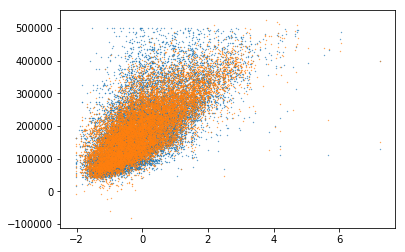

In [51]:
from sklearn.preprocessing import PolynomialFeatures

model = Pipeline([('poly', PolynomialFeatures(degree=3)),
                  ('linear', LinearRegression())])

model = model.fit(housing_prepared, housing_labels)
housing_predictions = model.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)
plt.scatter(x=housing_prepared[:,7], y= housing_labels, s=0.1)
plt.scatter(x=housing_prepared[:,7], y=housing_predictions, s=0.1) # Plot the predictions against the actual values.
# x: standard deviations from the mean of median income,
# y: median house value

How does the performance of the polynomial regression model compare to the first-order linear regression? You see that the performance improves as the complexity of the feature space increases. However, note that the more complex the model becomes, the more accurately it learns to replicate the training data, and the less likely it will generalise to the new pattern, i.e. in the test data. This phenomenon of learning to replicate the patterns from the training data too closely is called *overfitting*, and it is an opposite of *underfitting* when the model does not learn enough about the pattern from the training data due to its simplicity.

Just to give you a flavor of the problem, here is an example of a complex model from the `sklearn` suite called `DecisionTreeRegressor` (Decision Trees are outside of the scope of this course, so don't worry if this looks unfamiliar to you. `sklearn` has implementation for a wide range of ML algorithms, so do check the [documentation](http://scikit-learn.org/stable/auto_examples/tree/plot_tree_regression.html) if you want to learn more). Note that the `DecisionTreeRegressor` learns to predict the values in the training data perfectly well (resulting in the error of $0$!) which usually means that it won't work well on the new data – e.g., check this later on the test data:

In [52]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg = tree_reg.fit(housing_prepared, housing_labels)
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_mse = np.sqrt(tree_mse)
tree_mse

0.0

### Learning to better evaluate you model using cross-validation

Obviously, one of the problems with overfitting above is caused by the fact that you're training and testing on the same (training) set (remember, that you should do all model tuning and optimisation on the training data, and only then apply the best model to the test data). So how can you measure the level of overfitting *before* you apply this model to the test data?

There are two possible solutions. You can either reapply `train_test_split` function from Step 2 to set aside part of the training set as a *development* (or *validation*) set, and then train the model on the smaller training set and tune it on the development set, before applying your best model to the test set. Or you can use *cross-validation*.

With *K-fold cross-validation* strategy, the training data gets randomly split into $k$ distinct subsets (*splits*). Then the model gets trained $10$ times, in each run being tested on a different fold and trained on the other $9$ folds. That way, the algorithm is evaluated on each data point in the training set, but during training is not exposed to the data points that it gets tested on later. The result is an array of $10$ evaluation scores, which can be averaged for better understanding and model comparison, i.e.:

In [53]:
from sklearn.model_selection import cross_val_score
    
def analyse_cv(model):   
    scores = cross_val_score(model, housing_prepared, housing_labels,
                             scoring = "neg_mean_squared_error", cv=10)

    # cross-validation expects utility function (greater is better)
    # rather than cost function (lower is better), so the scores returned
    # are negative as they are the opposite of MSE
    sqrt_scores = np.sqrt(-scores) 
    print("Scores:", sqrt_scores)
    print("Mean:", sqrt_scores.mean())
    print("Standard deviation:", sqrt_scores.std())
    
analyse_cv(model)

Scores: [2.19604025e+06 1.74113776e+06 7.55916582e+07 4.06107288e+05
 5.52484827e+05 5.35701287e+04 7.80713767e+04 5.57259236e+04
 1.04769600e+09 6.32501228e+04]
Mean: 112843404.87176402
Standard deviation: 312418471.49003774


This shows that the `DecisionTreeRegression` model does not actually perform well when tested on a set different from the one it was trained on. What about the other models? E.g.:

In [54]:
analyse_cv(lin_reg)

Scores: [56407.74804911 57638.15546127 60310.91317534 63458.92319162
 59290.86181859 59610.72694733 57135.16967241 57392.24546341
 60865.02876197 59073.51369537]
Mean: 59118.32862364237
Standard deviation: 2000.9661372338537


Let's try one more model – [`RandomForestRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) that implements many Decision Trees (similar to above) on random subsets of the features. This type of models are called *ensemble learning* models and they are very powerful because they benefit from combining the decisions of multiple algorithms:

In [55]:
from sklearn.ensemble import RandomForestRegressor

print('Forest Regressor:')
forest_reg = RandomForestRegressor()
analyse_cv(forest_reg)

# this analysis was run on the reduced data set without clusters at certain house values: 
# Note the terrible performance of the polynomial regressor, which was the same with the full data
print("\nLinear Regressor")
analyse_cv(lin_reg)
print("\nPolynomial Regressor")
analyse_cv(model)


Forest Regressor:


/home/dks28/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/dks28/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/dks28/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/dks28/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/home/dks28/.local/lib/python3.6/site-packages/sklearn/ensem

Scores: [45830.37368523 44972.02202683 48737.9504601  48173.99596666
 46425.18211022 48353.86959457 46590.20144945 44021.86514173
 49413.40865812 47353.93931597]
Mean: 46987.28084088782
Standard deviation: 1644.027247321469

Linear Regressor
Scores: [56407.74804911 57638.15546127 60310.91317534 63458.92319162
 59290.86181859 59610.72694733 57135.16967241 57392.24546341
 60865.02876197 59073.51369537]
Mean: 59118.32862364237
Standard deviation: 2000.9661372338537

Polynomial Regressor
Scores: [2.19604025e+06 1.74113776e+06 7.55916582e+07 4.06107288e+05
 5.52484827e+05 5.35701287e+04 7.80713767e+04 5.57259236e+04
 1.04769600e+09 6.32501228e+04]
Mean: 112843404.87176402
Standard deviation: 312418471.49003774


### Fine-tuning the model

Some learning algorithms have *hyperparameters* – the parameters of the algorithms that should be set up prior to training and don't get changed during training. Such hyperparameters are usually specified for the `sklearn` algorithms in brackets, so you can always check the list of parameters specified in the documentation. For example, whether the [`LinearRegression`](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) model should calculate the intercept or not should be set prior to training and does not depend on the training itself, and so does the number of helper algorithms (decision trees) that should be combined in a [`RandomForestRegressor`](http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) for the final prediction. `RandomForestRegressor` has $16$ parameters, so if you want to find the *best* setting of the hyperparametes for `RandomForestRegressor`, it will take you a long time to try out all possible combinations.

The code below shows you how the best hyperparameter setting can be automatically found for an `sklearn` ML algorithm using a `GridSearch` functionality. Let's use the example of `RandomForestRegressor` and focus on specific hyperparameters: the number of helper algorithms (decision trees in the forest, or `n_estimators`) and the number of features the regressor considers in order to find the most informative subsets of instances to each of the helper algorithms (`max_features`):

In [56]:
from sklearn.model_selection import GridSearchCV

# specify the range of hyperparameter values for the grid search to try out 
param_grid = {'n_estimators': [3, 10, 15, 30], 'max_features': [2, 4, 6, 8, 12]}

forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                          scoring="neg_mean_squared_error")
grid_search.fit(housing_prepared, housing_labels)

grid_search.best_params_

{'max_features': 8, 'n_estimators': 30}

You can also monitor the intermediate results as shown below. Note also that if the best results are achieved with the maximum value for each of the parameter specified for exploration, you might want to keep experimenting with even higher values to see if the results improve any further:

In [57]:
cv_results = grid_search.cv_results_
for mean_score, params in zip(cv_results["mean_test_score"], cv_results["params"]):
    print(np.sqrt(-mean_score), params)

57762.2398620646 {'max_features': 2, 'n_estimators': 3}
50671.479202452996 {'max_features': 2, 'n_estimators': 10}
49209.33155396351 {'max_features': 2, 'n_estimators': 15}
48130.48622123588 {'max_features': 2, 'n_estimators': 30}
54930.413433685935 {'max_features': 4, 'n_estimators': 3}
47716.45688714381 {'max_features': 4, 'n_estimators': 10}
46739.694921428134 {'max_features': 4, 'n_estimators': 15}
45730.976804724734 {'max_features': 4, 'n_estimators': 30}
52672.62542917622 {'max_features': 6, 'n_estimators': 3}
46672.984742602064 {'max_features': 6, 'n_estimators': 10}
46160.25156973061 {'max_features': 6, 'n_estimators': 15}
45045.40015029667 {'max_features': 6, 'n_estimators': 30}
52568.661405722065 {'max_features': 8, 'n_estimators': 3}
46410.03870901327 {'max_features': 8, 'n_estimators': 10}
45537.335606989895 {'max_features': 8, 'n_estimators': 15}
44626.51990098872 {'max_features': 8, 'n_estimators': 30}
51950.593374085794 {'max_features': 12, 'n_estimators': 3}
46703.49599

One more insight you can gain from the best estimator is the importance of each feature (expressed in the weight the best estimator learned to assign to each of the features). Here is how you can do that:

In [58]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([8.20432245e-02, 6.89636044e-02, 3.84497646e-02, 1.60700544e-02,
       1.62970422e-02, 1.47678832e-02, 1.56203009e-02, 3.12665390e-01,
       3.70878678e-02, 2.04400646e-02, 1.03402245e-01, 6.69411823e-02,
       2.59208803e-02, 1.71344603e-01, 1.05316317e-04, 4.77793845e-03,
       5.10263754e-03])

If you also want to display the feature names, you can do that as follows:

In [59]:
extra_attribs =  ['rooms_per_household', 'bedrooms_per_household', 'population_per_household', 'bedrooms_per_rooms']
cat_one_hot_attribs = ['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN']
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.3126653903548387, 'median_income'),
 (0.17134460276589605, 'INLAND'),
 (0.10340224536720174, 'population_per_household'),
 (0.08204322451642652, 'longitude'),
 (0.06896360443488278, 'latitude'),
 (0.06694118225350351, 'bedrooms_per_rooms'),
 (0.0384497646302055, 'housing_median_age'),
 (0.03708786776069693, 'rooms_per_household'),
 (0.02592088026774838, '<1H OCEAN'),
 (0.020440064646904062, 'bedrooms_per_household'),
 (0.016297042222977835, 'total_bedrooms'),
 (0.016070054353637044, 'total_rooms'),
 (0.01562030093010261, 'households'),
 (0.014767883194730784, 'population'),
 (0.005102637536833067, 'NEAR OCEAN'),
 (0.004777938446294816, 'NEAR BAY'),
 (0.00010531631711967022, 'ISLAND')]

How do these compare with the insights you gained earlier (e.g., during data exploration in Step 1, or during attribute exporation in Step 3)?


### At last, evaluating your best model on the test set!

Finally, let's take the best model you built and tuned on the training set and apply in to the test set:

50448.962700154116

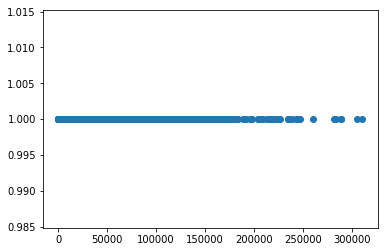

In [60]:
final_model = grid_search.best_estimator_

X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

plt.scatter(x=abs(y_test-final_predictions), y=np.ones(len(final_predictions)))
final_rmse

### This following cell was run after experimenting with dropping the rows that exhibited highly clustered behaviour at 350000, 450000, 500001.

It is worthy of note that the initial results with this modified data set seemed to improve, the cross-validation for the best estimator gave roughly 47000 rather than the mean of 49000 from before. I suppose this is due to the fact that the test set would have also exhibted the clustering from before.

The cell below that one, therefore, drops those rows from the test set as well.
Lo and behold, much better performance than previously seen. 

50448.962700154116

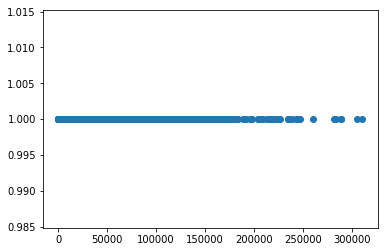

In [61]:

final_model = grid_search.best_estimator_

X_test_prepared = full_pipeline.transform(X_test)
final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

plt.scatter(x=abs(y_test-final_predictions), y=np.ones(len(final_predictions)))
final_rmse

42678.414560003956

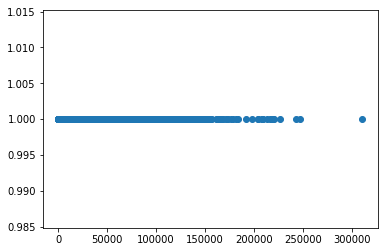

In [62]:
rows_dropped = y_test.loc[y_test==350000].append(
    y_test.loc[y_test==450000]).append(
    y_test.loc[y_test==500001]).index


final_model = grid_search.best_estimator_

X_test_prepared_woq = full_pipeline.transform(X_test.drop(rows_dropped, axis=0))
y_test_prepared_woq = y_test.drop(rows_dropped, axis=0)
final_predictions_woq = final_model.predict(X_test_prepared_woq)

final_mse_woq = mean_squared_error(y_test_prepared_woq, final_predictions_woq)
final_rmse_woq = np.sqrt(final_mse_woq)

plt.scatter(x=abs(y_test_prepared_woq-final_predictions_woq), y=np.ones(len(final_predictions_woq)))
final_rmse_woq

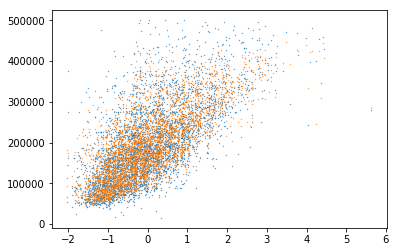

In [63]:
plt.scatter(x=X_test_prepared_woq[:,7], y=y_test_prepared_woq, s=0.1)
plt.scatter(x=X_test_prepared_woq[:,7], y=final_predictions_woq, s=0.1)

   ### The cell below was run after removing the features that were added by CombinedAttributesAdder
   
   It is somewhat interesting to see that this does not improve performance over the cell above, although the performance of the models in the training/development phase did slightly improve given the reduced data set and the removal of the combined features.

42678.414560003956

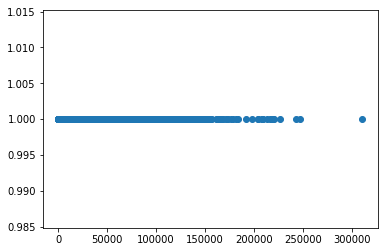

In [64]:
rows_dropped = y_test.loc[y_test==350000].append(
    y_test.loc[y_test==450000]).append(
    y_test.loc[y_test==500001]).index


final_model = grid_search.best_estimator_

X_test_prepared_woq_woadd = full_pipeline.transform(X_test.drop(rows_dropped, axis=0))
y_test_prepared_woq_woadd = y_test.drop(rows_dropped, axis=0)
final_predictions_woq_woadd = final_model.predict(X_test_prepared_woq_woadd)

final_mse_woq_woadd = mean_squared_error(y_test_prepared_woq_woadd, final_predictions_woq_woadd)
final_rmse_woq_woadd = np.sqrt(final_mse_woq_woadd)

plt.scatter(x=abs(y_test_prepared_woq_woadd-final_predictions_woq_woadd), y=np.ones(len(final_predictions_woq_woadd)))
final_rmse_woq_woadd 


42678.414560003956

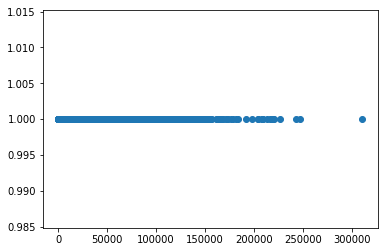

In [65]:
rows_dropped = y_test.loc[y_test==350000].append(
    y_test.loc[y_test==450000]).append(
    y_test.loc[y_test==500001]).index


final_model = grid_search.best_estimator_

X_test_prepared_woq_wolog = full_pipeline.transform(X_test.drop(rows_dropped, axis=0))
y_test_prepared_woq_wolog = y_test.drop(rows_dropped, axis=0)
final_predictions_woq_wolog = final_model.predict(X_test_prepared_woq_wolog)

final_mse_woq_wolog = mean_squared_error(y_test_prepared_woq_wolog, final_predictions_woq_wolog)
final_rmse_woq_wolog = np.sqrt(final_mse_woq_wolog)

plt.scatter(x=abs(y_test_prepared_woq_wolog-final_predictions_woq_wolog), y=np.ones(len(final_predictions_woq_wolog)))
final_rmse_woq_wolog 


### The next cell uses RandomSearchCv

It seems there is some benefit to be gained; the best model detected using this searching mechanism has achieved a rmse of 42915 at one point, which is the first time the regression predicts values with rmse < 43000

NameError: name 'models_found_by_random_search' is not defined

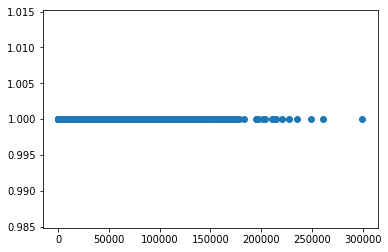

In [66]:
from sklearn.model_selection import RandomizedSearchCV

# specify the range of hyperparameter values for the grid search to try out 
param_grid = {'n_estimators': [3, 10, 15, 30], 
              'max_features': [2, 4, 6, 8, 12], 
              'max_depth': [3, 5, 10, 15, None], 
              'warm_start': [True, False], 
              'bootstrap': [True, False]}

forest_reg = RandomForestRegressor()
random_search = RandomizedSearchCV(forest_reg, param_grid, cv=5,
                          scoring="neg_mean_squared_error")
random_search.fit(housing_prepared, housing_labels)

rows_dropped = y_test.loc[y_test==350000].append(
    y_test.loc[y_test==450000]).append(
    y_test.loc[y_test==500001]).index


final_model = random_search.best_estimator_

X_test_prepared_woq_wolog = full_pipeline.transform(X_test.drop(rows_dropped, axis=0))
y_test_prepared_woq_wolog = y_test.drop(rows_dropped, axis=0)
final_predictions_woq_wolog_random_search = final_model.predict(X_test_prepared_woq_wolog)

final_mse_woq_wolog_random_search = mean_squared_error(y_test_prepared_woq, final_predictions_woq_wolog_random_search)
final_rmse_woq_wolog_random_search = np.sqrt(final_mse_woq_wolog_random_search)

plt.scatter(x=abs(y_test_prepared_woq_wolog-final_predictions_woq_wolog_random_search), y=np.ones(len(final_predictions_woq_wolog_random_search)))
models_found_by_random_search.append((final_model, final_rmse_woq_wolog_random_search))
final_rmse_woq_wolog_random_search

In [ ]:
#models_found_by_random_search = [final_model]
models_found_by_random_search # Give a list of found models and their rmses.

# Assignments

**For the tick session**:

## 1. 
Familiarise yourself with the code in this practical. During the tick session, be prepared to discuss the different steps and answer questions (as well as ask questions yourself).

## 2.
Experiment with the different steps in the ML pipeline:
- try dropping less informative features from the feature set and test whether it improves performance
- use other options in preprocessing: e.g., different imputer strategies, min-max rather than standardisation for scaling, feature scaling vs. no feature scaling, and compare the results
- evaluate the performance of the simple linear regression model on the test set. What is the `final_rmse` for this model?
- estimate different feature importance weights with the simple linear regression model (if unsure how to extract the feature weights, check [documentation](http://scikit-learn.org/stable/modules/linear_model.html)). How do these compare to the (1) feature importance weights with the best estimator, and (2) feature correlation scores with the target value from Step 3?
- [`RandomizedSearchCV`](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html), as opposed to the `GridSearchCV` used in the practical, does not try out each parameter values combination. Instead it only tries a fixed number of parameter settings sampled from the specified distributions. As a result, it allows you to try out a wider range of parameter values in a less expensive way than `GridSearchCV`. Apply `RandomizedSearchCV` and compare the best estimator results.

Finally, if you want to have more practice with regression tasks, you can **work on the following optional task**:

## 3. (Optional)

Use the bike sharing dataset (`./bike_sharing/bike_hour.csv`, check `./bike_sharing/Readme.txt` for the description), apply the ML steps and gain insights from the data. What data transformations should be applied? Which attributes are most predictive? What additional attributes can be introduced? Which regression model performs best?